# Clustering Examples 
This notebook shows some simple examples of clustering algorithms.

In [1]:
# dataframe management
import pandas as pd             

# numerical computation
import numpy as np

# import matplotlib and allow it to plot inline
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# define color palettes
from matplotlib.colors import ListedColormap
# background_cmap3 = ListedColormap(['#68abf0','#b2d0b7','#f65d79'])
background_cmap3 = ListedColormap(['#a6cdf6','#b2d0b7','#f98ea1'])
background_cmap2 = ListedColormap(['#a6cdf6','#b2d0b7']) #'#f98ea1'])
dots_cmap = ListedColormap(['#1b80e8','#599062','#e20c32'])
plt.register_cmap(cmap=background_cmap3)
# plt.register_cmap(cmap=background_cmap2)
plt.register_cmap(cmap=dots_cmap)
colors = ['#1b80e8','#599062','#e20c32']
# colors2 = ['#1b80e8','#599062'] #'#e20c32']
point_size = 40
line_width = 4

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")

from sklearn import datasets
# from sklearn import linear_model
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import model_selection

In [2]:
# define the random seed if needed
random_seed = 1234

# define the figure size and the font size
fig_width = 12
fig_height = 9
fig_font_size = 16

## The Dataset
First we load the data and check out the number of examples, variables, and classes. Then, we define the input variables X and the target class value y.

In [3]:
iris = datasets.load_iris()
target = np.array(iris.target)

print("Number of examples: ", iris.data.shape[0])
print("Number of variables:", iris.data.shape[0])
print("Variable names:     ", iris.feature_names)
print("Target values:      ", iris.target_names)
print("Class Distribution  ", [(x,sum(target==x)) for x in np.unique(target)])

Number of examples:  150
Number of variables: 150
Variable names:      ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target values:       ['setosa' 'versicolor' 'virginica']
Class Distribution   [(0, 50), (1, 50), (2, 50)]


In [5]:
X = iris.data[:, [2, 3]]
y = iris.target

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from scipy.spatial.distance import cdist, pdist

import matplotlib
%matplotlib inline

# color palette 
color_palette1 = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[0],plt.cm.Paired.colors[2],plt.cm.Paired.colors[4]], name='DecisionSurfaceColorMap')
color_palette2 = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[1],plt.cm.Paired.colors[3],plt.cm.Paired.colors[5]], name='DataPointsColorMap')

Let's define the grid to plot the decision boundaries for the predictions.

In [7]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# resolution
h = .01

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

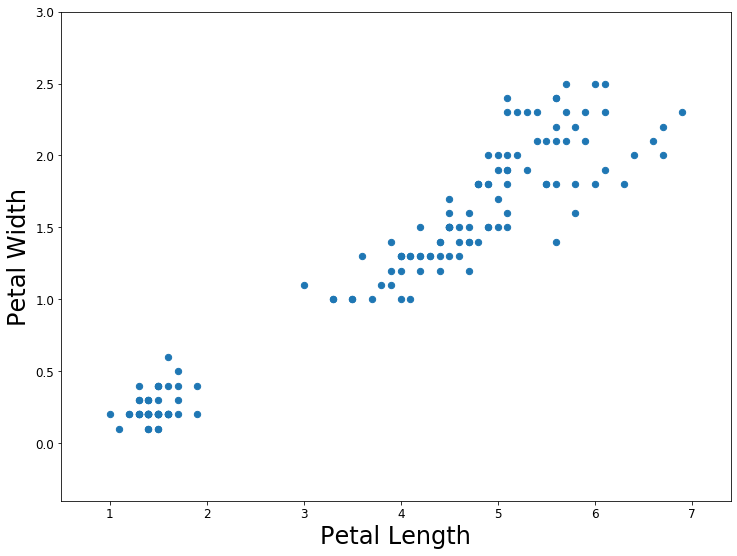

In [9]:
plt.figure(figsize=(12, 9))

plt.rc('font', **{'family' : 'sans', 'size'   : 24})
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.scatter(X[:, 0], X[:, 1], s=point_size) 

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()

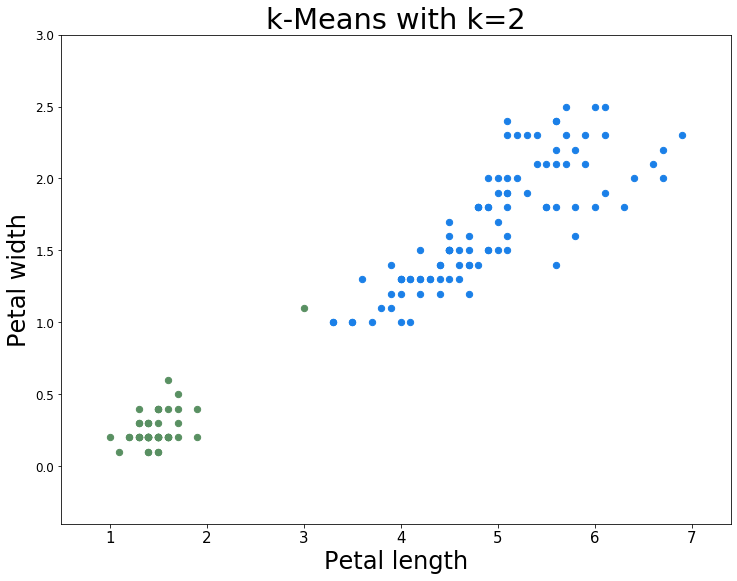

In [10]:
yp = KMeans(n_clusters=2).fit_predict(X)
plt.figure(figsize=(12, 9))

plt.rc('font', **{'family' : 'sans', 'size'   : 24})
plt.rc('xtick', labelsize=15)

for i in [0, 1, 2]:
    idx = np.where(np.array(yp)==i)
    plt.scatter(X[idx, 0], X[idx, 1], s=point_size, c=colors[i]) 

plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.title("k-Means with k=2")
plt.show()

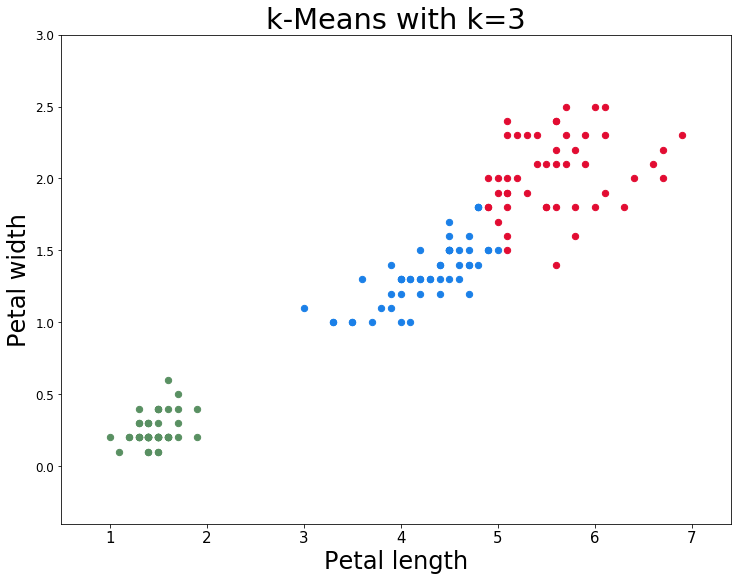

In [11]:
yp = KMeans(n_clusters=3).fit_predict(X)
plt.figure(figsize=(12, 9))

plt.rc('font', **{'family' : 'sans', 'size'   : 24})
plt.rc('xtick', labelsize=15)

for i in [0, 1, 2]:
    idx = np.where(np.array(yp)==i)
    plt.scatter(X[idx, 0], X[idx, 1], s=point_size, c=colors[i]) 

plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.title("k-Means with k=3")
plt.show();